In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = r'https://www.pilgrimsolutions.com/dataset/weatherAUS.csv'
df = pd.read_csv(path, sep=',')
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
df.isnull().sum() #check null values

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
#cambio de tipo la fecha, ya que aparece como objeto

# Convierte la columna "Date" a tipo fecha
df['Date'] = pd.to_datetime(df['Date'])

# Verifica el cambio de tipo de datos
print(df.dtypes)


Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object


In [5]:
#procedo con la limpieza de los nulos con la media por orden y en una nueva copia del df

df2 = df.copy()
# Reemplazar los valores nulos en la columna MinTemp con el promedio de la columna
df2['MinTemp'].fillna(df2['MinTemp'].mean(), inplace=True)

# Reemplazar los valores nulos en la columna MaxTemp con el promedio de la columna
df2['MaxTemp'].fillna(df2['MaxTemp'].mean(), inplace=True)

# En la columna Rainfall con 0, asumiendo que la falta de datos significa que no hubo lluvia registrada
df2['Rainfall'].fillna(0, inplace=True)

# Reemplazar los valores nulos en la columna Evaporation con el promedio de la columna
df2['Evaporation'].fillna(df2['Evaporation'].mean(), inplace=True)

# Reemplazar los valores nulos en la columna Evaporation con el promedio de la columna
df2['Evaporation'].fillna(df2['Evaporation'].mean(), inplace=True)

# Reemplazar los valores nulos en la columna Sunshine con el promedio de la columna. 
# Corresponde al número de horas de luz

df2['Sunshine'].fillna(df2['Sunshine'].mean(), inplace=True)

df2.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
#compruebo valores únicos de WindGustDir para ver la mejor manera de sustituir los nulos
#7   WindGustDir    135134 non-null  object 
# WindGustDir      10326

unicos_wind = df2['WindGustDir'].unique()
print(unicos_wind)

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']


In [7]:
#decido rellenar los nulos de esta variable categórica con 'unknown', para mantener la información sobre la ausencia de los datos

df2['WindGustDir'] = df2['WindGustDir'].fillna('Unknown')
df2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [11]:
#compruebo valores unicos de las otras columnas con la direccion del viento y decido sustituir los nulos como con windgustdir
unicos_wind9 = df2['WindDir9am'].unique()
unicos_wind3 = df2['WindDir3pm'].unique()
print(unicos_wind9)
print(unicos_wind3)     


['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'Unknown' 'SSW' 'N' 'WSW' 'ESE'
 'E' 'NW' 'WNW' 'NNE']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']


In [21]:

df2['WindDir9am'] = df2['WindDir9am'].fillna('Unknown')
df2['WindDir3pm'] = df2['WindDir3pm'].fillna('Unknown')

In [25]:
#completo estos nulos porque no tengo claro que eliminarlos sea la opción aunque sean porcentajes pequeños
df2['WindGustSpeed'].fillna(df2['WindGustSpeed'].median(), inplace=True)
df2['WindSpeed9am'].fillna(df2['WindSpeed9am'].median(), inplace=True)
df2['WindSpeed3pm'].fillna(df2['WindSpeed3pm'].median(), inplace=True)
df2['Humidity9am'].fillna(df2['Humidity9am'].median(), inplace=True)
df2['Humidity3pm'].fillna(df2['Humidity3pm'].median(), inplace=True)
df2['Pressure9am'].fillna(df2['Pressure9am'].median(), inplace=True)
df2['Pressure3pm'].fillna(df2['Pressure3pm'].median(), inplace=True)
df2['Cloud9am'].fillna(df2['Cloud9am'].median(), inplace=True)
df2['Cloud3pm'].fillna(df2['Cloud3pm'].median(), inplace=True)
df2['Temp9am'].fillna(df2['Temp9am'].median(), inplace=True)
df2['Temp3pm'].fillna(df2['Temp3pm'].median(), inplace=True)
df2


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,5.468232,7.611178,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,5.468232,7.611178,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,5.468232,7.611178,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,5.468232,7.611178,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No


In [26]:
#en este caso sí elimino celdas con los valores nulos en estas dos columnas 

df2 = df2.dropna(subset=['RainTomorrow', 'RainToday'])
df2.isnull().sum()


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [27]:
unicos_location = df2['Location'].unique()
print(unicos_location)

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [46]:
#cambio el tipo de las variables categoricas
df2['WindGustDir'] = df2['WindGustDir'].astype('category')
df2['RainTomorrow'] = df2['RainTomorrow'].astype('category')
df2['RainToday'] = df2['RainToday'].astype('category')
df2['WindDir9am'] = df2['WindDir9am'].astype('category')
df2['WindDir3pm'] = df2['WindDir3pm'].astype('category')
df2['Location'] = df2['Location'].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140787 non-null  datetime64[ns]
 1   Location       140787 non-null  category      
 2   MinTemp        140787 non-null  float64       
 3   MaxTemp        140787 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    140787 non-null  float64       
 6   Sunshine       140787 non-null  float64       
 7   WindGustDir    140787 non-null  category      
 8   WindGustSpeed  140787 non-null  float64       
 9   WindDir9am     140787 non-null  category      
 10  WindDir3pm     140787 non-null  category      
 11  WindSpeed9am   140787 non-null  float64       
 12  WindSpeed3pm   140787 non-null  float64       
 13  Humidity9am    140787 non-null  float64       
 14  Humidity3pm    140787 non-null  float64       
 15  

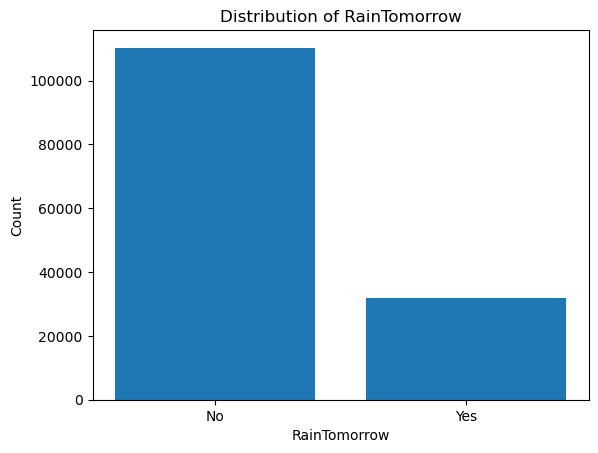

In [47]:
#comienzo un análisis para comprender la proporcion de registros con y sin lluvia
import matplotlib.pyplot as plt

rain = df['RainTomorrow'].value_counts()

plt.bar(rain.index, rain.values)
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.title('Distribution of RainTomorrow')
plt.show()


In [49]:
from scipy.stats import chi2_contingency
import numpy as np

categorical_vars = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow', 'RainToday']
correlation_matrix = np.zeros((len(categorical_vars), len(categorical_vars)))

for i in range(len(categorical_vars)):
    for j in range(len(categorical_vars)):
        contingency_table = pd.crosstab(df2[categorical_vars[i]], df2[categorical_vars[j]])
        _, _, _, expected = chi2_contingency(contingency_table)
        correlation_matrix[i, j] = np.sqrt(chi2_contingency(contingency_table)[0] / (contingency_table.sum().sum() * (min(contingency_table.shape) - 1)))
        
correlation_matrix_df = pd.DataFrame(correlation_matrix, index=categorical_vars, columns=categorical_vars)
print(correlation_matrix_df)


              Location  WindGustDir  WindDir9am  WindDir3pm  RainTomorrow  \
Location      1.000000     0.279755    0.211577    0.218582      0.159089   
WindGustDir   0.279755     1.000000    0.229865    0.347115      0.106385   
WindDir9am    0.211577     0.229865    1.000000    0.199639      0.127102   
WindDir3pm    0.218582     0.347115    0.199639    1.000000      0.097429   
RainTomorrow  0.159089     0.106385    0.127102    0.097429      0.999979   
RainToday     0.157895     0.143392    0.190415    0.141166      0.313076   

              RainToday  
Location       0.157895  
WindGustDir    0.143392  
WindDir9am     0.190415  
WindDir3pm     0.141166  
RainTomorrow   0.313076  
RainToday      0.999980  


In [41]:
from scipy.stats import chi2_contingency

# Crear tabla de contingencia entre 'RainTomorrow' y 'Location'
contingency_table = pd.crosstab(df2['RainTomorrow'], df2['WindDir3pm'])

# Realizar prueba de chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Imprimir el valor p
print("Valor p:", p_value)


Valor p: 7.573688973424688e-275


esto indica que hay una asociación altamente significativa entre estas dos variables. El valor extremadamente bajo del valor p sugiere que la diferencia observada en las frecuencias entre las categorías de 'RainTomorrow' y 'WindDir3pm' no es aleatoria, sino que existe una relación significativa entre ellas.

La dirección del viento en el período de la tarde (WindDir3pm) puede tener un impacto en la predicción de si lloverá o no al día siguiente (RainTomorrow). por lo que puede ser un predictor relevante para determinar la probabilidad de lluvia.

El resto de variables categoricas me daban 0 así que estimo que no son relevantes

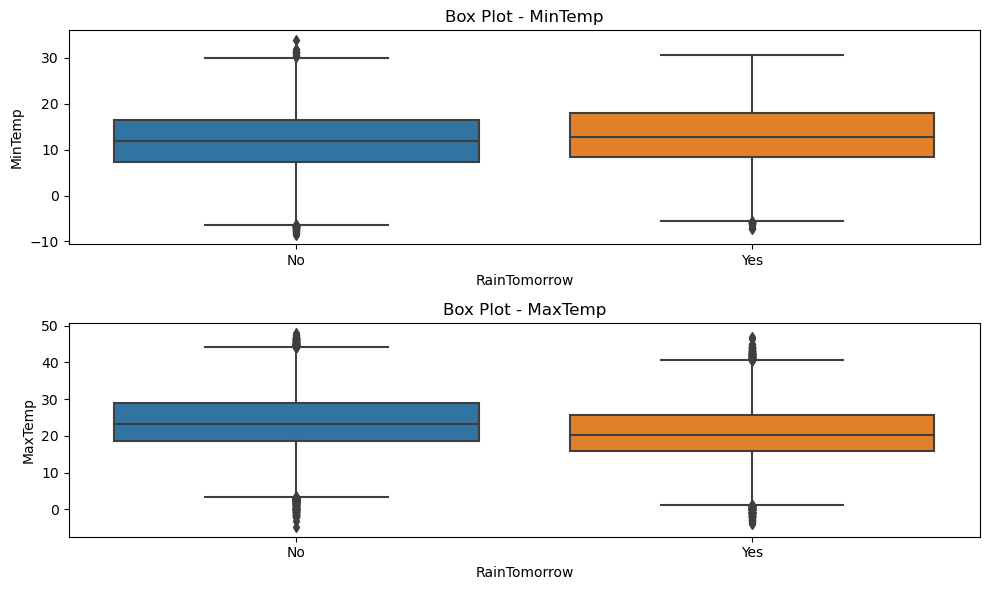

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear box plots para MinTemp y MaxTemp en función de RainTomorrow
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.boxplot(x='RainTomorrow', y='MinTemp', data=df2)
plt.title('Box Plot - MinTemp')

plt.subplot(2, 1, 2)
sns.boxplot(x='RainTomorrow', y='MaxTemp', data=df2)
plt.title('Box Plot - MaxTemp')

plt.tight_layout()
plt.show()
